In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
pd.options.display.max_rows = 7 
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3) 
plt.rcParams['font.family'] = 'sans-serif'

In [6]:
weather_2012 = pd.read_csv('university /data/weather_2012.csv', parse_dates=True, index_col='Date/Time (LST)')
weather_2012[:5]

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,NaN,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,NaN,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,NaN,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,NaN,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,NaN,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow


In [7]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

In [11]:
is_snowing[:5]

Date/Time (LST)
2012-03-01 00:00:00    True
2012-03-01 01:00:00    True
2012-03-01 02:00:00    True
2012-03-01 03:00:00    True
2012-03-01 04:00:00    True
Name: Weather, dtype: bool

<Axes: xlabel='Date/Time (LST)'>

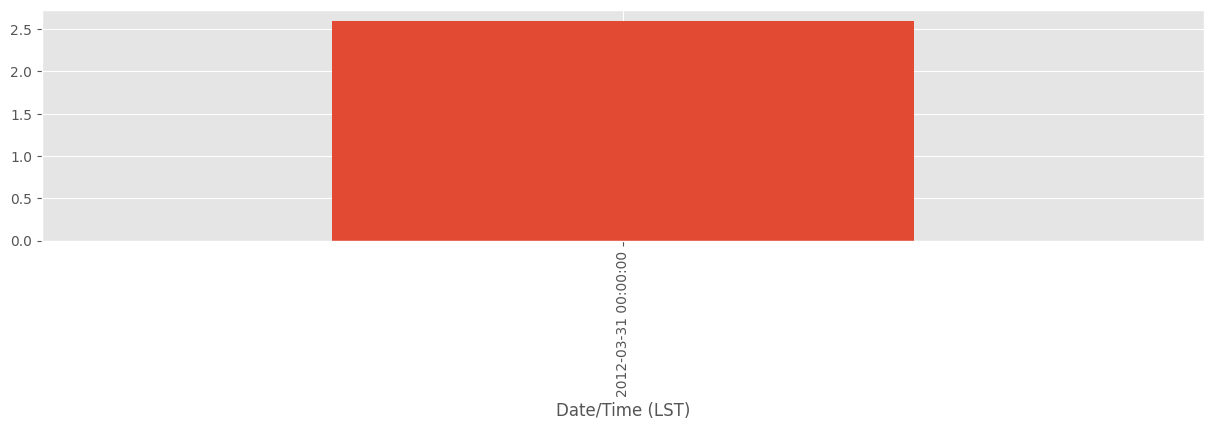

In [28]:
weather_2012['Temp (°C)'].resample('ME').median().plot(kind='bar')

In [29]:
is_snowing.astype(int)[:10]

Date/Time (LST)
2012-03-01 00:00:00    1
2012-03-01 01:00:00    1
2012-03-01 02:00:00    1
                      ..
2012-03-01 07:00:00    1
2012-03-01 08:00:00    1
2012-03-01 09:00:00    1
Name: Weather, Length: 10, dtype: int64

In [31]:
is_snowing.astype(int).resample('ME').mean()

Date/Time (LST)
2012-03-31    0.087366
Freq: ME, Name: Weather, dtype: float64

In [35]:
temperature = weather_2012['Temp (°C)'].resample('ME').median() 
is_snowing = weather_2012['Weather'].str.contains('Snow') 
snowiness = is_snowing.astype(int).resample('ME').mean()
# Name the columns
temperature.name = "Temperature" 
snowiness.name = "Snowiness"

stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time (LST),,
2012-03-31,2.6,0.087366


<Axes: xlabel='Date/Time (LST)'>

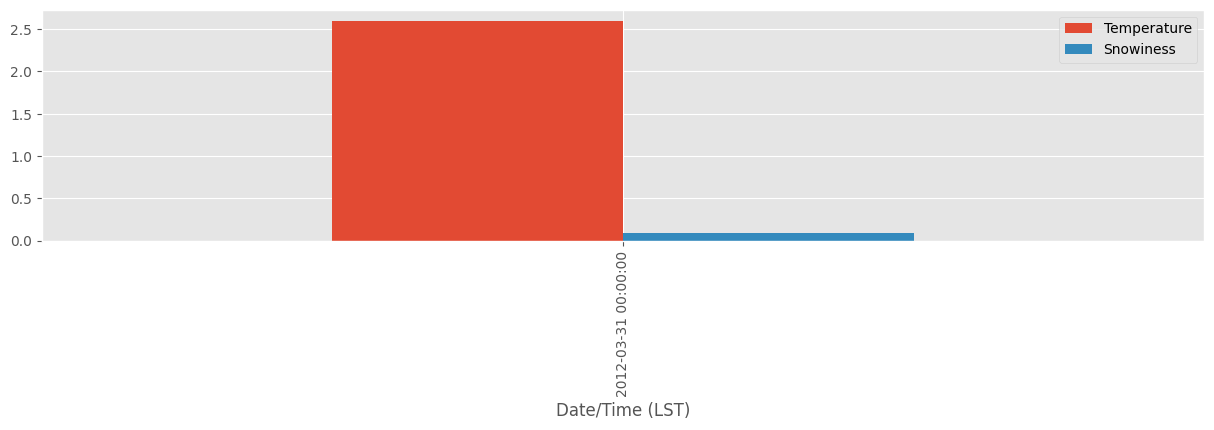

In [36]:
stats.plot(kind='bar')

array([<Axes: title={'center': 'Temperature'}, xlabel='Date/Time (LST)'>,
       <Axes: title={'center': 'Snowiness'}, xlabel='Date/Time (LST)'>],
      dtype=object)

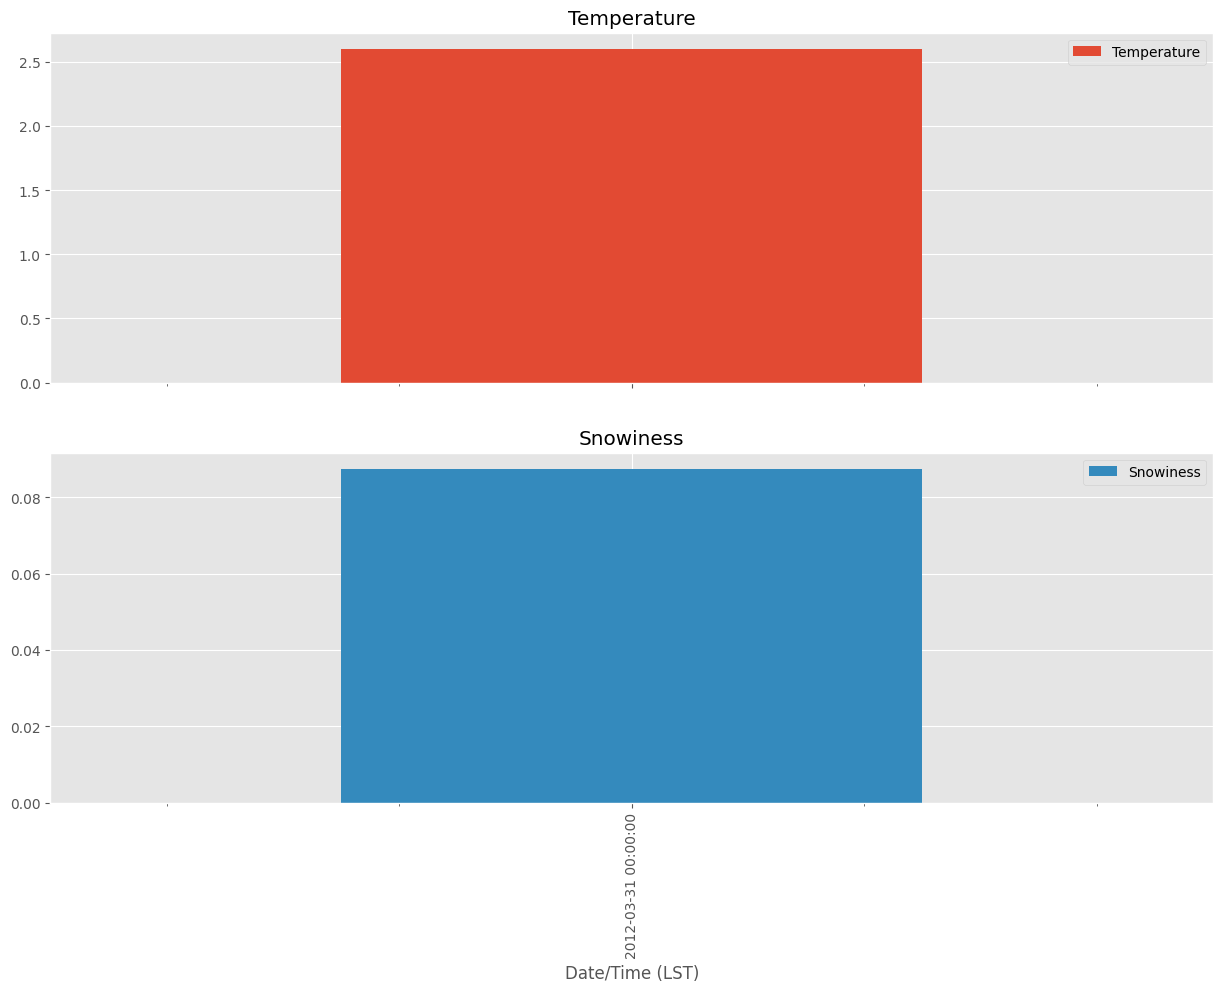

In [37]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))